### Code

In [1]:
# Modules
import get_data as gd 
import cheat_contagion as cc
import alt_universe as au


In [2]:
# Stage 1. Get data
killings = gd.get_killings_data('data/kills.txt', 3, 4) 
cheaters = gd.get_cheaters_data('data/cheaters.txt', 1, 2)

# Data overview
print('Kills data overview:\n', killings[0])
print('Cheaters data overview:\n', dict(list(cheaters.items())[0:2]))
print('Number of killings:', len(killings))
print('Number of cheaters:', len(cheaters.keys()))

Kills data overview:
 ['040d4435-9603-4640-b50e-7a3b3077392f', 'account.ba877183bdfd407ab6db337eca604eb9', 'account.f917b3772bf94def84958e6042c7b6ae', datetime.date(2019, 3, 10), datetime.time(0, 24, 33, 868)]
Cheaters data overview:
 {'account.4c2ff8d26c594ca88e78a3ae1afd9bde': [datetime.date(2019, 3, 1), datetime.date(2019, 3, 3)], 'account.e0d28cb829634b81bb61ee434bee1dcc': [datetime.date(2019, 3, 5), datetime.date(2019, 3, 9)]}
Number of killings: 516880
Number of cheaters: 2295


In [3]:
# Stage 2. Identify observer cheater motifs
# As said in docstrings, functions assume that within matches, killings data are sorted by the sequence of killings, 
# i.e. by time, and that it is organized by match, i.e. observations from the same match are adjacent.

# Stage 2.1 Observants of cheaters under both assumptions
possible_motifs = cc.observed_cheating(killings, cheaters)
print('Number of times cheating behavior was observed:', len(possible_motifs)) 

# Stage 2.2 Observer-cheater motifs
cheater_motifs = cc.obs_cheater_motifs(possible_motifs)
print('Number of observer-cheater motifs:', len(cheater_motifs))

Number of times cheating behavior was observed: 70981
Number of observer-cheater motifs: 731


In [4]:
# Stage 3. Generate alternative universes
n_randomizations = 10

# 3.1 Generate data
# Execute randomizations and save files
au.randomize_save('data/kills_random_', killings, cheaters, n_randomizations) 

# Load all universes in a single list
all_univ = au.load_data_onelist('data/kills_random_', n_randomizations) 

# 3.2 List of observer-cheater motifs for each randomization
possible_motifs_r10 = [cc.observed_cheating(all_univ[i], cheaters) for i in range(n_randomizations)]
cheater_motifs_r10 = [cc.obs_cheater_motifs(possible_motifs_r10[i]) for i in range(n_randomizations)]

# 3.3 Observer-cheater motif count by the original data and for each randomization
final_data_ran = [(len(cheater_motifs_r10[i])) for i in range(n_randomizations)]
print('Number of observer-cheater motifs by universe:', final_data_ran)

final_data = len(cheater_motifs)


10 file(s) saved!
Number of observer-cheater motifs by universe: [731, 729, 747, 717, 723, 745, 744, 739, 735, 744]


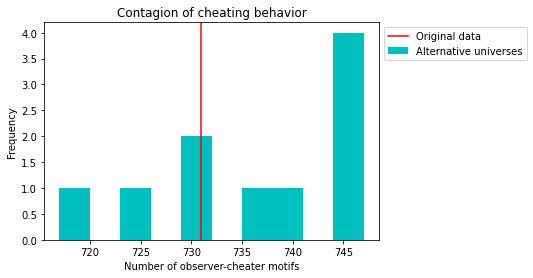

In [5]:
# Graph
import matplotlib.pyplot as plt

plt.hist(final_data_ran, color = 'c', label = 'Alternative universes')  
plt.axvline(x = final_data, color = 'r', 
            label = 'Original data')

plt.xlabel('Number of observer-cheater motifs')
plt.ylabel('Frequency')
plt.title('Contagion of cheating behavior')

plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

### Brief analysis of results
The results from this exercise indicate that the expected hypothesis cannot be assured. If we take these results as correct, exposure to possible cheating behavior does not uniquely incite cheating. An underlying mechanism, which could also explain the increase of observer-cheater motifs when randomizing, is that people who have tendencies to cheat, sooner or later start cheating. 
